In [ ]:
# Mount our Google Drive
# from google.colab import drive

# drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Importing Necessary Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("/home/siddhu/Desktop/Movie Recommender System/Movie-Recommendation-System-with-XAI/data/movie-data-csv/trailers12k.csv")
df.head()

,title,year,plot,synopsis,genres
0,Kate & Leopold,2001,['An English Duke from 1876 is inadvertedly dr...,"In 1876, Leopold Alexis Elijah Walker Gareth T...","['comedy', 'fantasy', 'romance']"
1,The Fantasticks,2000,['A mysterious fair that comes to a small comm...,NaN,"['musical', 'romance']"
2,For the Cause,2000,['Earth is in a state of constant war and two ...,NaN,"['action', 'adventure', 'drama', 'fantasy', 's..."
3,Glitter,2001,['A young singer dates a disc jockey who helps...,In the nightclub scene of the 1970s New York C...,"['drama', 'music', 'romance']"
4,In the Mood for Love,2000,['Two neighbors form a strong bond after both ...,Two couples Mr and Mrs Chan ( Mrs Chan played ...,"['drama', 'romance']"


### Data Understanding

In [5]:
df.columns

Index(['title', 'year', 'plot', 'synopsis', 'genres'], dtype='object')

In [6]:
df.shape

(12000, 5)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     12000 non-null  object
 1   year      12000 non-null  int64 
 2   plot      12000 non-null  object
 3   synopsis  4919 non-null   object
 4   genres    12000 non-null  object
dtypes: int64(1), object(4)
memory usage: 468.9+ KB


In [8]:
missing_info = df.isnull().sum().to_frame(name='Null Count')
missing_info['Null Percentage (%)'] = (df.isnull().mean() * 100).round(2)
missing_info = missing_info.sort_values(by='Null Count', ascending=False)
missing_info

,Null Count,Null Percentage (%)
synopsis,7081,59.01
title,0,0.00
year,0,0.00
plot,0,0.00
genres,0,0.00


In [11]:
df.describe()

,year
count,12000.000000
mean,2011.683667
std,5.285429
min,1999.000000
25%,2008.000000
50%,2013.000000
75%,2016.000000
max,2021.000000


In [12]:
import ast

# Parsing string representations of lists (like "[comedy, drama]") into actual Python list objects (['comedy', 'drama'])
df['genres'] = df['genres'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

Check one random instance of a movie plot

In [14]:
# Select one random row
random_row = df.sample(1).iloc[0]
# Print the title and plot
print(f"🎬 Title: {random_row['title']}")
print(f"📅 Year: {random_row['year']}")
print(f"📖 Plot: {random_row['plot']}")

🎬 Title: Noise
📅 Year: 2007
📖 Plot: ['A man who is being driven crazy by the noise in New York City decides to take vigilante action against it.', 'In long flashbacks, David Owen looks back to when he lived in Manhattan with his wife and baby. The unnecessary noises of the city interrupt his life to the point that he takes a baseball bat to the windshield of cars whose alarms are blaring. After a few arrests, his wife kicks him out. On his own, he learns to avoid arrest and leaves a calling card as "The Rectifier" when he breaks into an offending car. Gruska, an enterprising young reporter, tracks him down. He tells her his story, they become lovers, and she organizes a petition drive for a ballot initiative to ban car alarms. The mayor becomes the Rectifier\'s bête noire. Can David fight City Hall and win?', 'A black comedy about a man caught in the most impossible of conundrums: in love with his hometown, New York City, but driven mad by its noise. Transforming himself into "The Rect

Check the minimum and maximum number of movie plots a single instance has

In [16]:
# Convert 'plots' from string to list if it's stored as string
df['plot'] = df['plot'].apply(ast.literal_eval)
# Compute number of plots for each row
df['num_plots'] = df['plot'].apply(len)

# Find min and max
min_plots = df['num_plots'].min()
max_plots = df['num_plots'].max()

print(f"Minimum number of plots in a single movie: {min_plots}")
print(f"Maximum number of plots in a single movie: {max_plots}")

Minimum number of plots in a single movie: 0
Maximum number of plots in a single movie: 9


Check the maximum and minimum length of plot description

In [18]:
# Convert the list of plot descriptions into a single string per movie
df['merged_plot'] = df['plot'].apply(lambda plots: ' '.join(plots))

# Calculate the length of each description
description_lengths = df['merged_plot'].str.len()

max_length = description_lengths.max()
min_length = description_lengths.min()

print(f"Maximum description length: {max_length}")
print(f"Minimum description length: {min_length}")

Maximum description length: 8348
Minimum description length: 0


Check the maximum and minimum number of genres a particular movie has

In [19]:
# Calculate the number of genres for each movie
genre_counts = df['genres'].apply(len)

# Find the max and min number of genres
max_genres = genre_counts.max()
min_genres = genre_counts.min()

print(f"Maximum number of genres for a movie: {max_genres}")
print(f"Minimum number of genres for a movie: {min_genres}")

Maximum number of genres for a movie: 10
Minimum number of genres for a movie: 1


Maximum and minimum movie released year

In [20]:
latest_movie_year = df['year'].max()
oldest_movie_year = df['year'].min()

print(f"Latest oldest year of a movie : {latest_movie_year}")
print(f"Oldest realease year a movie: {oldest_movie_year}")

Latest oldest year of a movie : 2021
Oldest realease year a movie: 1999


### Exploratory Data Analysis

Check distribution of each individual genres



In [21]:
from collections import Counter

all_genres = df['genres'].dropna().sum()
genre_counts = Counter(all_genres)
genre_df = pd.DataFrame(genre_counts.items(), columns=['Genre', 'Count']).sort_values(by='Count', ascending=False).reset_index(drop=True)
genre_df['Percentage (%)'] = (genre_df['Count'] / genre_df['Count'].sum()) * 100
genre_df

,Genre,Count,Percentage (%)
0,drama,6106,16.701770
1,thriller,4560,12.472989
2,comedy,4247,11.616839
3,action,3226,8.824093
4,crime,2615,7.152821
5,horror,2575,7.043409
6,romance,2266,6.198200
7,adventure,2073,5.670286
8,mystery,1677,4.587106
9,fantasy,1648,4.507782


Genre distribution plot by Count


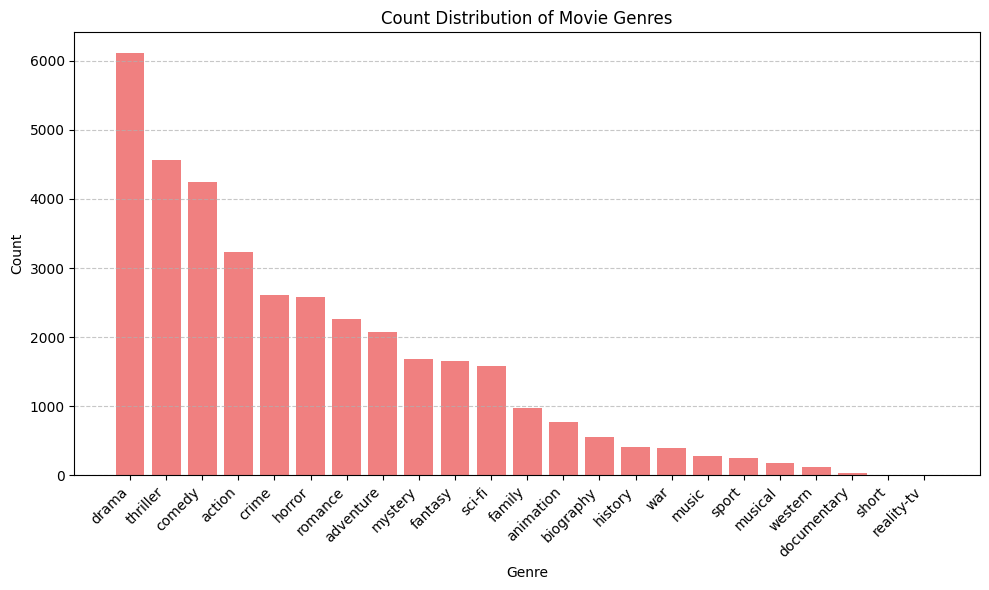

In [22]:
# Plotting the distribution by percentage
plt.figure(figsize=(10, 6))
plt.bar(genre_df['Genre'], genre_df['Count'], color='lightcoral')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Count Distribution of Movie Genres')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
print("Genre distribution plot by Count")

Most Common Genre Combinations

In [23]:
genre_sets = df['genres'].apply(lambda x: list(frozenset(x)))
genre_set_counts = genre_sets.value_counts()
genre_set_counts.head(20)

genres
[drama, comedy]                      458
[drama, romance, comedy]             426
[comedy]                             405
[horror, thriller]                   348
[romance, comedy]                    319
[drama, thriller, crime]             304
[horror]                             279
[drama, romance]                     256
[action, thriller, crime]            229
[horror, thriller, mystery]          228
[action, thriller, drama, crime]     203
[drama]                              202
[drama, thriller]                    181
[drama, crime]                       171
[action, thriller]                   145
[drama, thriller, mystery, crime]    143
[horror, comedy]                     113
[horror, drama, thriller]            103
[thriller]                            96
[comedy, crime]                       94
Name: count, dtype: int64

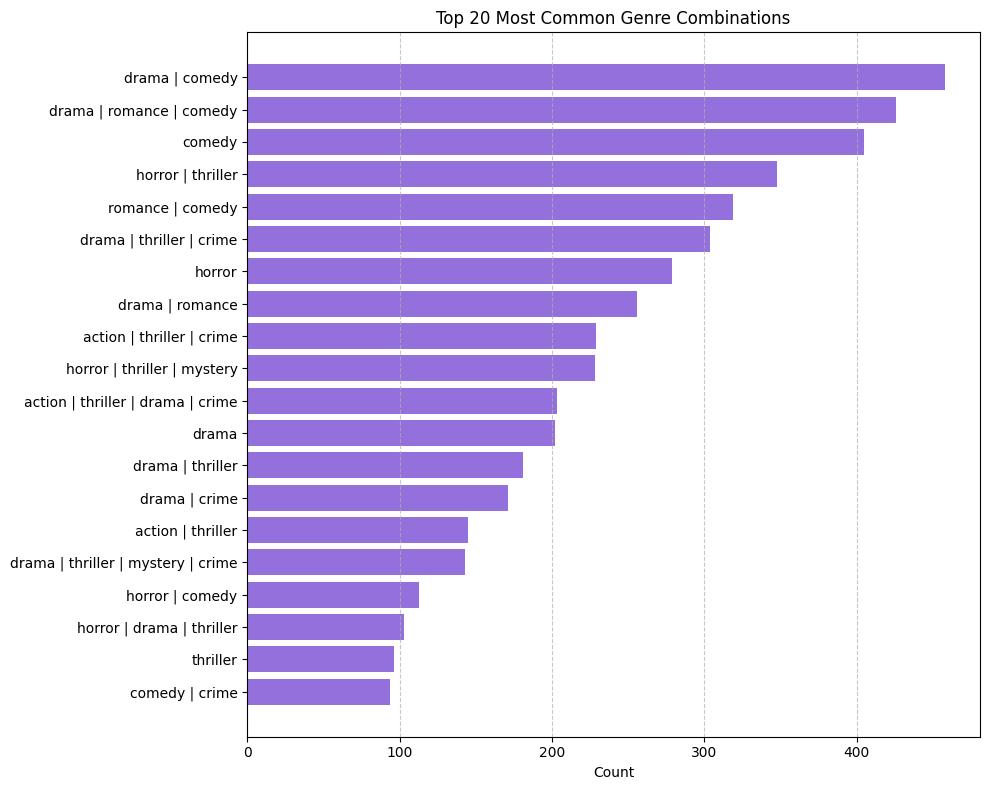

In [24]:
top_20_genres = genre_set_counts.head(20)
labels = [' | '.join(g) for g in top_20_genres.index]
plt.figure(figsize=(10, 8))
plt.barh(labels, top_20_genres.values, color='mediumpurple')
plt.xlabel('Count')
plt.title('Top 20 Most Common Genre Combinations')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Most Common Genre Combinations (With more than one genre)

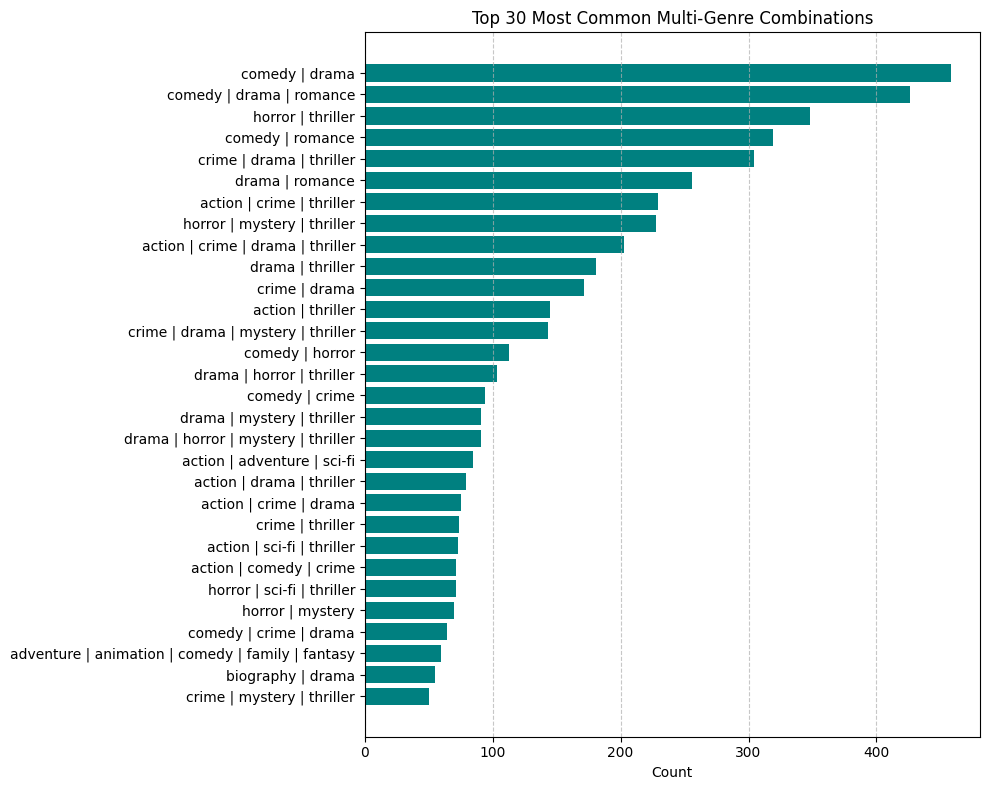

In [25]:
genre_sets = df['genres'].apply(lambda x: frozenset(x))
genre_set_counts = genre_sets.value_counts()
multi_genre_combinations = genre_set_counts[[len(g) > 1 for g in genre_set_counts.index]]
top_multi_genres = multi_genre_combinations.head(30)
labels = [' | '.join(sorted(g)) for g in top_multi_genres.index]
plt.figure(figsize=(10, 8))
plt.barh(labels, top_multi_genres.values, color='teal')
plt.xlabel('Count')
plt.title('Top 30 Most Common Multi-Genre Combinations')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Most Common Single Genre (With more than one genre)

In [26]:
genre_sets = df['genres'].apply(lambda x: list(frozenset(x)))
genre_set_counts = genre_sets.value_counts()
multi_genre_combinations = genre_set_counts[[len(g) <= 1 for g in genre_set_counts.index]]
top_multi_genres = multi_genre_combinations.head(20)
top_multi_genres

genres
[comedy]         405
[horror]         279
[drama]          202
[thriller]        96
[action]          42
[sci-fi]          20
[crime]           17
[fantasy]          7
[adventure]        7
[romance]          6
[documentary]      1
Name: count, dtype: int64

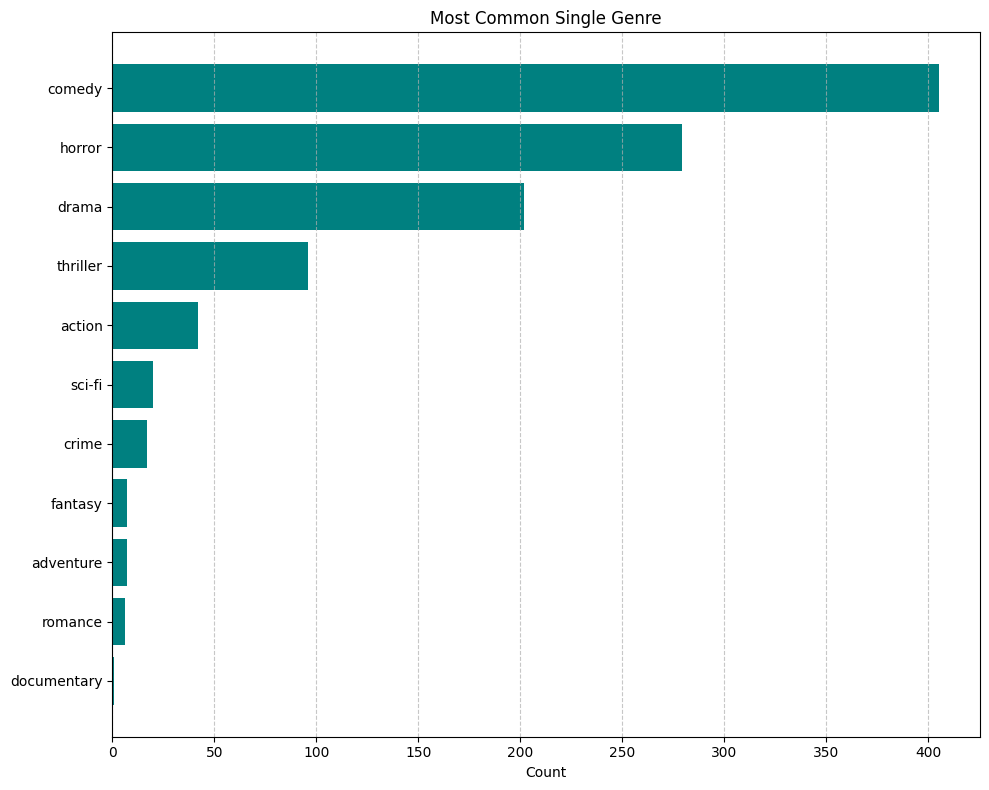

In [27]:
labels = [' | '.join(sorted(g)) for g in top_multi_genres.index]
plt.figure(figsize=(10, 8))
plt.barh(labels, top_multi_genres.values, color='teal')
plt.xlabel('Count')
plt.title('Most Common Single Genre')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()